In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
#fetch original mnist dataset
# from sklearn.datasets import fetch_mldata


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
test_data = pd.read_csv('/gdrive/MyDrive/OCR/Dataset/emnist-byclass-test.csv')
train_data = pd.read_csv('/gdrive/MyDrive/OCR/Dataset/emnist-byclass-train.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697931 entries, 0 to 697930
Columns: 785 entries, 35 to 0.475
dtypes: int64(785)
memory usage: 4.1 GB


In [6]:
test_data.head()

,18,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
train_examples = 60000
test_examples = 10000

In [9]:
X_test = test_data.iloc[:, 1:]
X_test = X_test.iloc[:test_examples, :]
Y_test = test_data.iloc[:, 0]
Y_test = Y_test.iloc[:test_examples]
X_train = train_data.iloc[:, 1:]
X_train = X_train.iloc[:train_examples, :]
Y_train = train_data.iloc[:, 0]
Y_train = Y_train.iloc[:train_examples]
print(f'X test shape: {X_test.shape}')
print(f'Y test shape: {Y_test.shape}')

print(f'X test shape: {X_train.shape}')
print(f'Y test shape: {Y_train.shape}')


X test shape: (10000, 784)
Y test shape: (10000,)
X test shape: (60000, 784)
Y test shape: (60000,)


(-0.5, 27.5, 27.5, -0.5)

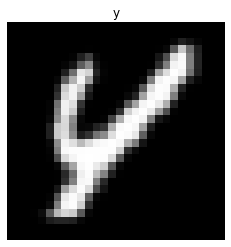

In [39]:
index = np.random.randint(X_test.shape[0])
test_image = X_test.iloc[index, :].values.reshape(28, 28)
test_label = Y_test.iloc[index]
labels = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
# print(len(labels))
plt.imshow(test_image.T, cmap= 'gray')
plt.title(labels[test_label])
plt.axis('off')

In [40]:
from sklearn.preprocessing import scale

In [41]:
X_train = scale(X_train)

In [43]:
X_test = scale(X_test)

In [44]:
param_C = 5
param_gamma = 0.05  # by tweaking these params might improve the results

In [45]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Plots confusion matrix, 
    
    cm - confusion matrix
    """
    plt.figure(1, figsize=(15, 12), dpi=160)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()  

In [ ]:
# classifier = svm.SVC(C=param_C,gamma=param_gamma)
# classifier = svm.SVC(kernel='linear')
classifier=svm.SVC(kernel='rbf')


#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, Y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))


In [ ]:
expected = Y_test
predicted = classifier.predict(X_test)


print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
# print("Confusion matrix:\n%/s" % cm)

# plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
